Problem Statement:

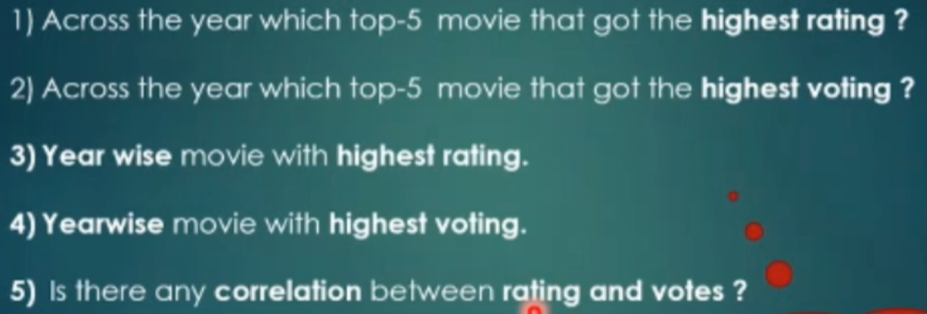

In [ ]:
import pandas as pd
import numpy as np

Data Ingestion from different files & merge the dataset

In [ ]:
movie_rating_filepath = "bollywood_movie_dataset\\bollywood_ratings_2010-2019.csv"
movie_meta_filepath = "bollywood_movie_dataset\\bollywood_meta_2010-2019.csv"
year_of_interest = range(2010, 2020)

df_movie_rating = pd.read_csv(
    filepath_or_buffer= movie_rating_filepath,
    header=0,
    index_col='imdb_id'
    )

df_movie_meta = pd.read_csv(
    filepath_or_buffer=movie_meta_filepath,
    header=0,
    usecols=['imdb_id','title','original_title','year_of_release'],
    index_col='imdb_id',
    na_values={'year_of_release':'\\N'},
    na_filter=True
    )


Data Cleaning & Transformation

In [ ]:
df_movie_rating.dropna(inplace=True)
df_movie_rating.drop_duplicates(inplace=True)

df_movie_meta.dropna(inplace=True)
df_movie_meta.drop_duplicates(inplace=True)

# Filter movies released between Year of Interest from the Movie Meta
df_movie_meta = df_movie_meta[df_movie_meta['year_of_release'].agg(lambda x: x in year_of_interest)]

# Combine the two datasets with row index from "df_movie_meta"
df_movie_data = pd.merge(df_movie_meta, df_movie_rating, left_index=True, right_index=True, how='inner')

# df_movie_data.to_csv("debug.csv")

Data Analysis: To findthe Year Wise Metrics (#1 Top 5 rated, #2 Top 5 Voted, #3 Top Rated, #4 Top Voted), Group the data by Year and compute

In [ ]:
# Function to find the Statistics for a year
def movie_year_analysis(x):
    x['rank_rated'] = x['imdb_rating'].rank(ascending=False)
    x = x.sort_values(by='rank_rated', ascending=True)
    top_5_rated = x[['title','imdb_rating']].iloc[0:5]
    top_5_rated = list(top_5_rated['title'].values)
    top_rated = x[['title','imdb_rating']].iloc[0]

    x['rank_voted'] = x['imdb_votes'].rank(ascending=False)
    x = x.sort_values(by='rank_voted', ascending=True)
    top_5_voted = x[['title','imdb_votes']].iloc[0:5]
    top_5_voted = list(top_5_voted['title'].values)
    top_voted = x[['title','imdb_votes']].iloc[0]

    return {
        'Top 5 rated movies:': top_5_rated,
        'Top rated movie:':top_rated['title'],
        'Top 5 voted movies:':top_5_voted,
        'Top voted movie:':top_voted['title']
    }

# Split & Apply
groups = df_movie_data.groupby(df_movie_data['year_of_release'])
movie_stats = {}

for name, group in groups:
    movie_stats[name] = movie_year_analysis(group)

Display the Movie Stats Results

In [ ]:
for i in movie_stats:
    print(f'Year: {i}')
    print(movie_stats[i])

Correlation data based on Rating & Voting

In [ ]:
df_movie_data.plot.scatter(
    x='imdb_votes',
    y='imdb_rating'
)